In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
train_df = pd.read_csv("cleaned_train.csv")

In [5]:
train_df.head()

,Unnamed: 0,id,keyword,location,text,target,words_counts,Text_length,punctuation_count
0,0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,14,71,1
1,1,4,NaN,NaN,forest fire near la ronge sask canada,1,8,40,1
2,2,5,NaN,NaN,all residents asked to shelter in place are be...,1,25,139,3
3,3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,9,67,2
4,4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,18,92,2


In [7]:
test_df = pd.read_csv("cleaned_test.csv")
test_df.head()

,Unnamed: 0,id,keyword,location,text,words_counts,Text_length,punctuation_count
0,0,0,NaN,NaN,just happened a terrible car crash,6,34,0
1,1,2,NaN,NaN,heard about earthquake is different cities sta...,11,68,3
2,2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,19,96,2
3,3,9,NaN,NaN,apocalypse lighting spokane wildfires,7,46,3
4,4,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,8,45,0


In [8]:
train_df.shape, test_df.shape

((7613, 9), (3263, 8))

In [9]:
train_df.dtypes

Unnamed: 0            int64
id                    int64
keyword              object
location             object
text                 object
target                int64
words_counts          int64
Text_length           int64
punctuation_count     int64
dtype: object

In [10]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7613.0,3806.000000,2197.828132,0.0,1903.0,3806.0,5709.0,7612.0
id,7613.0,5441.934848,3137.116090,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.495060,0.0,0.0,0.0,1.0,1.0
words_counts,7613.0,17.952712,7.524151,1.0,12.0,18.0,24.0,73.0
Text_length,7613.0,94.290950,35.535489,6.0,67.0,95.0,123.0,260.0
punctuation_count,7613.0,3.438855,3.248080,0.0,1.0,3.0,5.0,61.0


In [11]:
train_df.isnull().sum()

Unnamed: 0              0
id                      0
keyword                61
location             2533
text                    0
target                  0
words_counts            0
Text_length             0
punctuation_count       0
dtype: int64

In [12]:
X = train_df.drop(["id"],axis=1)
X.head()

,Unnamed: 0,keyword,location,text,target,words_counts,Text_length,punctuation_count
0,0,NaN,NaN,our deeds are the reason of this earthquake ma...,1,14,71,1
1,1,NaN,NaN,forest fire near la ronge sask canada,1,8,40,1
2,2,NaN,NaN,all residents asked to shelter in place are be...,1,25,139,3
3,3,NaN,NaN,13000 people receive wildfires evacuation orde...,1,9,67,2
4,4,NaN,NaN,just got sent this photo from ruby alaska as s...,1,18,92,2


In [13]:
print(train_df["id"].nunique())
print(train_df["keyword"].nunique())
print(train_df["location"].nunique())
print(train_df["target"].unique())
print(train_df["text"].nunique())

7613
221
3333
[1 0]
6890


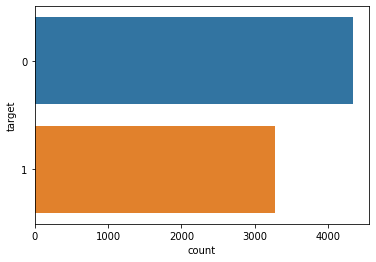

In [14]:
sns.countplot(y=train_df.target);

In [15]:
# Check number of unique keywords, and whether they are the same for train and test sets
print (train_df.keyword.nunique(), test_df.keyword.nunique())
print (set(train_df.keyword.unique()) - set(test_df.keyword.unique()))


221 221
set()


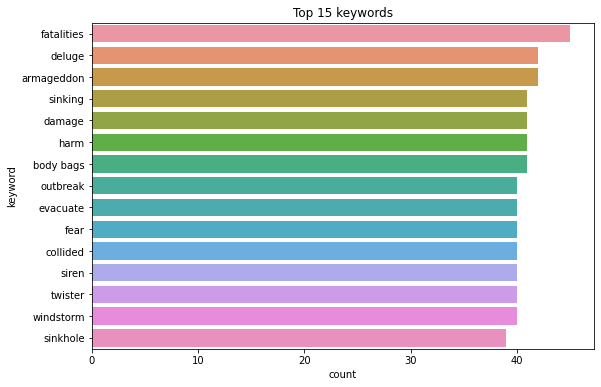

fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
harm          41
body bags     41
outbreak      40
evacuate      40
fear          40
Name: keyword, dtype: int64

In [16]:
test_df['keyword'] = test_df['keyword'].str.replace('%20', ' ')

# Most common keywords
plt.figure(figsize=(9,6))
sns.countplot(y=train_df.keyword, order = train_df.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()
train_df.keyword.value_counts().head(10)

C:\Users\Pulak\anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top keywords for disaster tweets')

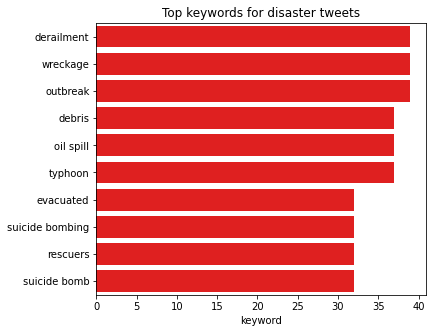

In [17]:
kw_d = train_df[train_df.target==1].keyword.value_counts().head(10)
kw_nd = train_df[train_df.target==0].keyword.value_counts().head(10)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(kw_d, kw_d.index, color='red')
plt.title('Top keywords for disaster tweets')


C:\Users\Pulak\anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


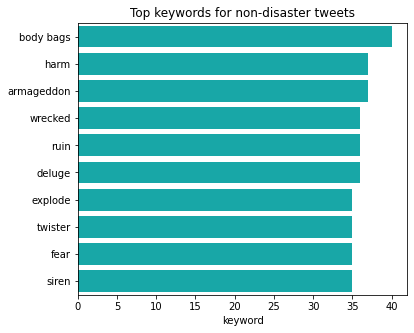

In [18]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(kw_nd, kw_nd.index, color='c')
plt.title('Top keywords for non-disaster tweets')
plt.show()

C:\Users\Pulak\anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Keywords with highest % of disaster tweets')

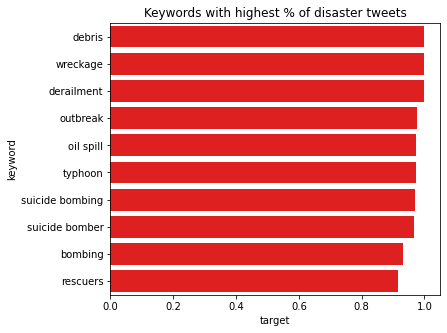

In [19]:
top_d = train_df.groupby('keyword').mean()['target'].sort_values(ascending=False).head(10)
top_nd = train_df.groupby('keyword').mean()['target'].sort_values().head(10)

plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(top_d, top_d.index, color='red')
plt.title('Keywords with highest % of disaster tweets')
# plt.subplot(122)
# sns.barplot(top_nd, top_nd.index, color='yellow')
# plt.title('Keywords with lowest % of disaster tweets')
# plt.show()

C:\Users\Pulak\anaconda3\envs\capstone\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


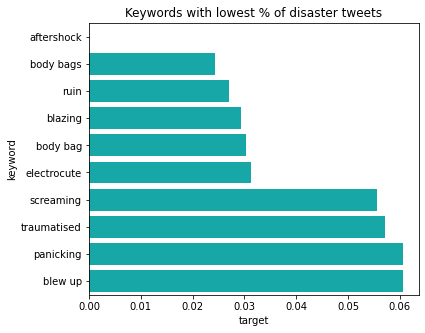

In [20]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.barplot(top_nd, top_nd.index, color='c')
plt.title('Keywords with lowest % of disaster tweets')
plt.show()

In [20]:
df = pd.concat([train_df,test_df])
df.shape

(10876, 5)

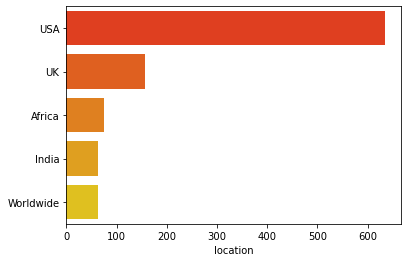

In [21]:
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)
sns.barplot(y = df['location'].value_counts()[:5].index, x = df['location'].value_counts()[:5],
            palette='autumn', orient='h')

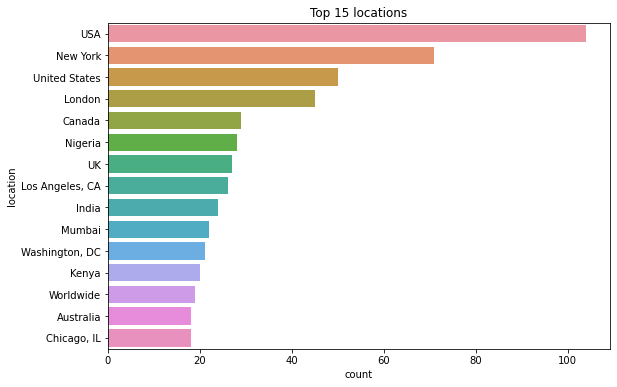

In [22]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train_df.location, order = train_df.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

In [23]:
# from wordcloud import WordCloud
# # tuples = [tuple(x) for x in train_df.keyword]
# # wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
# wc = WordCloud(width=800, height=400, max_words=200).generate(train_df['keyword'])

In [24]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
# # Start with one review:
# text = train_df['keyword'].astype(str)


# # Create and generate a word cloud image:
# wordcloud = WordCloud().generate_from_frequencies(text)

# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
# import locationtagger
# import math
# def extract_location(x):
#   if x != 'nan':
#       return x
#   location = locationtagger.find_locations(text = str(x))
#   print(location.countries, location.regions, location.cities)
#   if location.cities != []:
#       return (str(location.cities[0]))
#   if location.regions != []:
#       return (str(location.regions[0]))
#   if location.countries != []:
#     return (str(location.countries[0]))
#   return x
  

# # Maybe turn dataframe into list and iterate along it or use a mask to remove null values, compute them, and then add them back in
# train_df['location'] = train_df['text'].apply(lambda x: extract_location(str(x)) if train_df['location'].isnull() else x)

In [25]:
print(train_df["location"].nunique())

3341


In [26]:
train_df.duplicated().sum()

0

In [27]:
train_df['words_counts'] = train_df.text.str.split().map(lambda x: len(x))

In [28]:
train_df.head()

,id,keyword,location,text,target,words_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16


In [29]:
train_df['Text_length'] = train_df['text'].apply(len)

In [30]:
import string
train_df['punctuation_count'] = train_df['text'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [31]:
train_df

,id,keyword,location,text,target,words_counts,Text_length,punctuation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133,3
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88,2
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11,83,5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20,125,5
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8,65,11
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19,137,5


In [32]:
# Need to remove URLS since they won't contribute
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
train_df['text']=train_df['text'].apply(lambda x : remove_URL(x))

In [33]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
train_df['text']=train_df['text'].apply(lambda x : remove_html(x))

In [34]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


train_df['text']=train_df['text'].apply(lambda x: remove_emoji(x))

In [35]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
train_df['text']=train_df['text'].apply(lambda x : remove_punct(x))

In [36]:
!pip install pyspellchecker

In [37]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [38]:
train_df['text']=train_df['text'].apply(lambda x : correct_spellings(x))

In [39]:
train_df['text'] = train_df['text'].apply(lambda x: x.lower())

In [40]:
train_df.to_csv("cleaned_trian.csv")

In [41]:
disaster_tweets = train_df.loc[train_df.target == 1]
non_disaster_tweets = train_df.loc[train_df.target == 0]

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


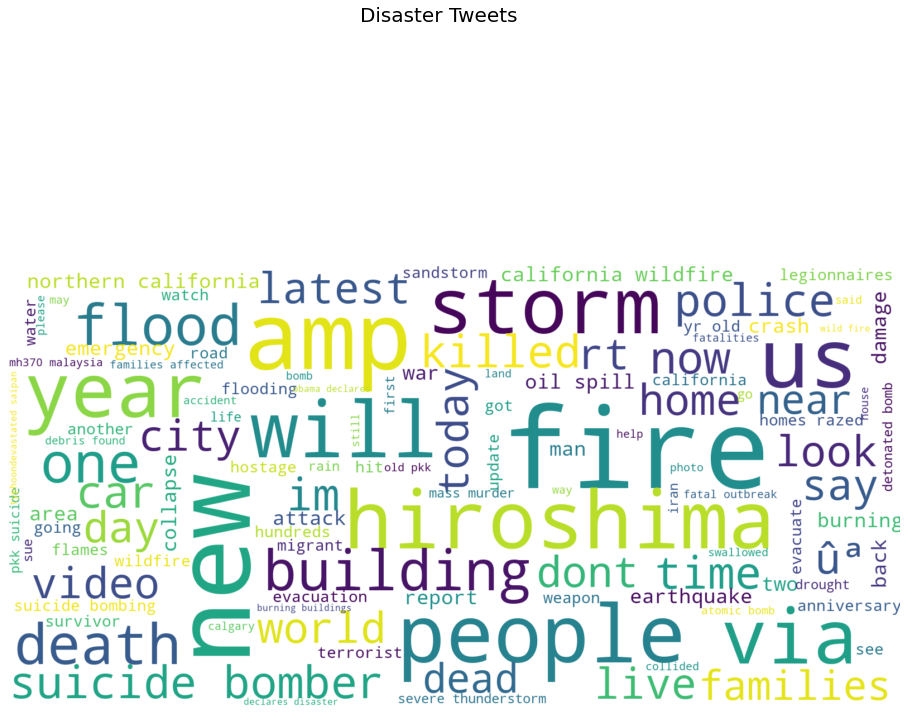

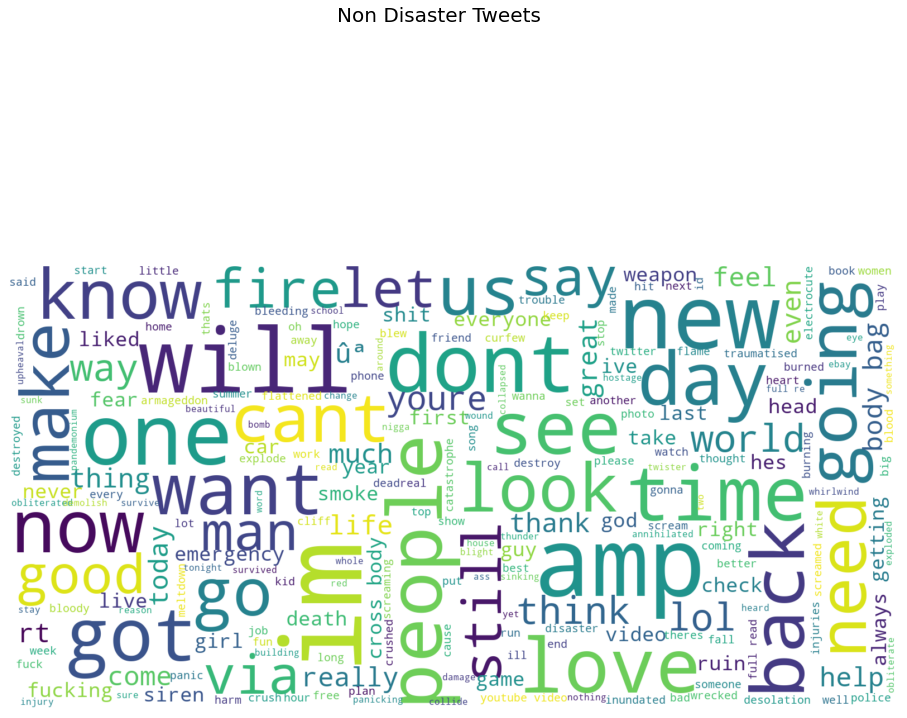

In [42]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title="", mask=None, color="white"):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(['S', 'https', 't',  'co', 'Û_', 'Û', 'U'])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask,background_color=color).generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=1.0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()
    
show_wordcloud(disaster_tweets.text, 'Disaster Tweets')
show_wordcloud(non_disaster_tweets.text, 'Non Disaster Tweets')

In [43]:
selection = train_df[~train_df['keyword'].isnull()]
selection.head()

,id,keyword,location,text,target,words_counts,Text_length,punctuation_count
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze,1,5,55,6
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0,10,67,8
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag set abla...,1,9,82,9
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0,7,34,1
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0,13,76,5


Text(0.5, 1.0, 'Correlation Heatmap')

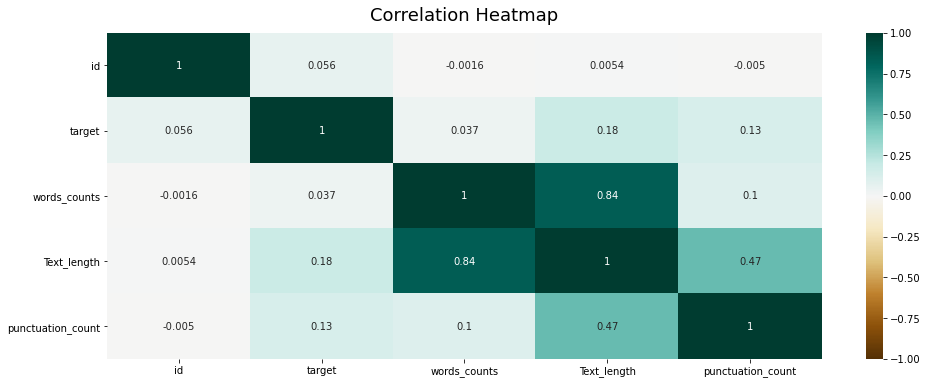

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(selection.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

#GloVe with Logistic Regression

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pulak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pulak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from tqdm import tqdm
from nltk import corpus, SnowballStemmer, word_tokenize

In [25]:
data = pd.read_csv('cleaned_test.csv')
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus   

In [26]:
corpus = create_corpus_new(data)

100%|██████████| 3263/3263 [00:00<00:00, 6835.26it/s]


In [27]:
embedding_dict={}
with open('glove.6B.100d.txt','r',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [108]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [109]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [110]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 24823


In [111]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec    

100%|████████████████████████████████████████████████████████████████████████| 24823/24823 [00:00<00:00, 722345.08it/s]


In [112]:
tweet_pad[0][0:]

array([ 118, 5821,   27,    1,  835,    6,   24,  255,  156, 1930, 3742,
         84,   46,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [114]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

In [115]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2482400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,562,901
Trainable params: 80,501
Non-trainable params: 2,482,400
_________________________________________________________________


In [117]:
train_new = tweet_pad[:train_df.shape[0]]
test_new = tweet_pad[train_df.shape[0]:]

In [119]:
X_train,X_test,y_train,y_test=train_test_split(train_new,train_df['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6090, 50)
Shape of Validation  (1523, 50)


In [120]:
# Recomended 10-20 epochs
history=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=2)

Epoch 1/10
48/48 - 5s - loss: 0.5973 - accuracy: 0.6816 - val_loss: 0.5102 - val_accuracy: 0.7754 - 5s/epoch - 102ms/step
Epoch 2/10
48/48 - 3s - loss: 0.4888 - accuracy: 0.7833 - val_loss: 0.4659 - val_accuracy: 0.7905 - 3s/epoch - 65ms/step
Epoch 3/10
48/48 - 3s - loss: 0.4734 - accuracy: 0.7982 - val_loss: 0.4528 - val_accuracy: 0.7892 - 3s/epoch - 64ms/step
Epoch 4/10
48/48 - 3s - loss: 0.4708 - accuracy: 0.7952 - val_loss: 0.4522 - val_accuracy: 0.7932 - 3s/epoch - 65ms/step
Epoch 5/10
48/48 - 3s - loss: 0.4567 - accuracy: 0.7977 - val_loss: 0.4498 - val_accuracy: 0.7905 - 3s/epoch - 63ms/step
Epoch 6/10
48/48 - 3s - loss: 0.4484 - accuracy: 0.8033 - val_loss: 0.4396 - val_accuracy: 0.7932 - 3s/epoch - 63ms/step
Epoch 7/10
48/48 - 3s - loss: 0.4542 - accuracy: 0.8018 - val_loss: 0.4538 - val_accuracy: 0.7925 - 3s/epoch - 64ms/step
Epoch 8/10
48/48 - 3s - loss: 0.4376 - accuracy: 0.8066 - val_loss: 0.4471 - val_accuracy: 0.7965 - 3s/epoch - 62ms/step
Epoch 9/10
48/48 - 3s - loss: 0

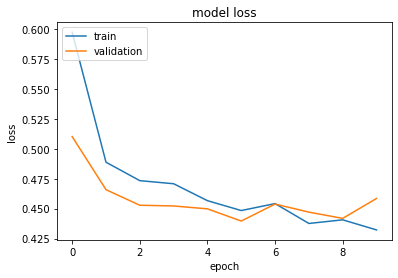

In [121]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

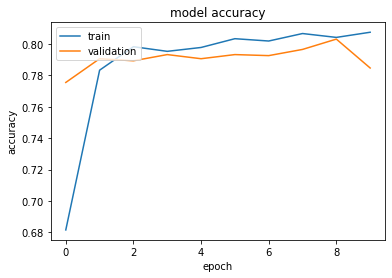

In [122]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [123]:
y_pred = model.predict(X_test)

In [130]:
from sklearn import metrics

In [135]:
cfmatrix = metrics.confusion_matrix(y_test, y_pred.argmax(axis=1))

In [125]:
cf_matrix=confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets